In [7]:
import signac
import os
import numpy as np
import matplotlib.pyplot as plt

def get_rdf_data(file, rdf_type):
    data = np.genfromtxt(file, names=True, delimiter=',')
    x = data['{}_x'.format(rdf_type)]
    y = data['{}_y'.format(rdf_type)]
    return x,y

ptb7_project = signac.get_project(root="/home/gwenwhite/cmelab/ptb7-itic/ptb7-project")
itic_project = signac.get_project(root="/home/gwenwhite/cmelab/ptb7-itic/ptb7-project")

%matplotlib inline

In [8]:
print(ptb7_project.detect_schema())
print('---------------------')
print(itic_project.detect_schema())

{
 'beats_cut': 'int([-9881, -9681, -9661, ..., -4000, -3800], 35)',
 'density': 'float([0.6, 0.7, 0.8, ..., 1.15, 1.2], 11)',
 'dt': 'float([0.001], 1)',
 'e_factor': 'float([0.5], 1)',
 'kT_reduced': 'float([0.8, 0.9, 1.0, ..., 2.3, 2.4], 17)',
 'molecule': 'str([PTB7_10mer_smiles, PTB7_15mer_smiles, PTB7_5mer_smiles], 3)',
 'n_compounds': 'int([66, 100, 132, ..., 1000, 2000], 9)',
 'n_steps': 'float([10000000.0, 20000000.0, 23000000.0, ..., 100000000.0, 500000000.0], 27)',
 'original_id': 'str([001d1416fedf98dea731e30b7d928762, 002969c1df9d89b2a01e0d396a12b8ea, 00f48f6b7d2d1c502a270b3025a51e5c, ..., ff9e18a2eab6f6742d7a3fc01374cf4f, ffb19d6519b8334b0747dad0568ed9ea], 560)',
 'process': 'str([anneal, quench], 2)',
 'remove_hydrogens': 'bool([True], 1)',
 'save': 'str([false, true], 2)',
 'size': 'str([large, medium, small], 3)',
 'tau': 'int([1], 1)',
}
---------------------
{
 'beats_cut': 'int([-9881, -9681, -9661, ..., -4000, -3800], 35)',
 'density': 'float([0.6, 0.7, 0.8, ..., 1

['PTB7_15mer_smiles', 'PTB7_5mer_smiles', 'PTB7_10mer_smiles']


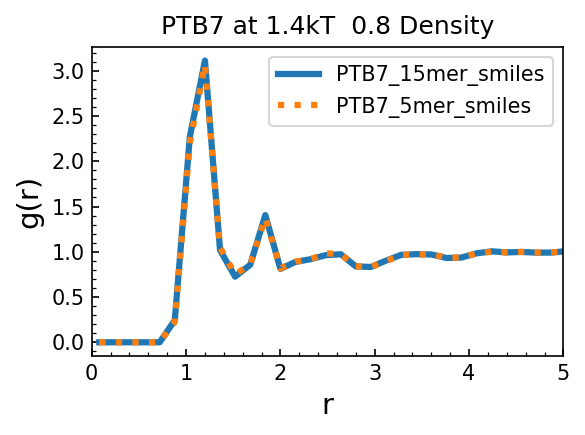

In [9]:
#%matplotlib qt
polymer_length = [5, 15]
ptb7_dict = {"size": "small", "process": "quench", "density":1.1, "kT_reduced":1.4}
low_density_jobs = ptb7_project.find_jobs(filter=ptb7_dict)
#low_density_jobs = low_density_jobs[0:2]
#job_temps = [job.sp['kT_reduced'] for job in low_density_jobs]
#job_temps.sort()
job_molecule = [job.sp['molecule'] for job in low_density_jobs]
print(job_molecule)

#color = plt.cm.GnBu(np.linspace(1, 0, len(job_molecule)))
fig = plt.figure(figsize=(4,3), dpi= 150)
ax = plt.subplot(111)
for idx, T in enumerate(job_molecule[0:2]):
    for job in low_density_jobs:
        if job.sp['molecule'] == T:
            file_path = os.path.join(job.workspace(), 'rdf-data.txt')
            x, y = get_rdf_data(file_path, rdf_type='sulfur')
            if idx == 1:
                ax.plot(x, y, label=job.sp['molecule'], linewidth=3, ls=':')
            else:
                ax.plot(x, y, label=job.sp['molecule'], linewidth=3)

            
            
    plt.xlabel("r", fontsize=14)
    plt.ylabel("g(r)", fontsize=14)        
    plt.title("PTB7 at 1.4kT  0.8 Density")    
    plt.legend(bbox_to_anchor=(1.2, 0), loc='lower right', ncol=1)        
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
    #ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
    ax.legend(loc='upper right')
    plt.xlim(0, 5.0)
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', direction='in', labelsize=10)
    plt.tight_layout()

In [10]:
#The graph shows that the results are the same for different polymer lengths